In [1]:
import h2o
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.211-b12, mixed mode)
  Starting server from C:\Users\malbalawi\AppData\Roaming\Python\Python37\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\malbalawi\AppData\Local\Temp\10\tmpk__2e5ik
  JVM stdout: C:\Users\malbalawi\AppData\Local\Temp\10\tmpk__2e5ik\h2o_malbalawi_started_from_python.out
  JVM stderr: C:\Users\malbalawi\AppData\Local\Temp\10\tmpk__2e5ik\h2o_malbalawi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,07 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.4
H2O cluster version age:,"21 days, 7 hours and 12 minutes"
H2O cluster name:,H2O_from_python_malbalawi_ft86k2
H2O cluster total nodes:,1
H2O cluster free memory:,1.653 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [31]:
##using a normally distributed random number generator. 
## So 68% of the values will be plus or minus 0.1 and plot shows that looks about right.
x= [z*0.01 for z in range (0,1001)]

In [15]:
print (x[0:5])
print (x[995:1001])

[0.0, 0.01, 0.02, 0.03, 0.04]
[9.950000000000001, 9.96, 9.97, 9.98, 9.99, 10.0]


In [23]:
y= np.sin(x)
print (y)
y= y *  np.random.normal(0,0.1,len(x))
print(y)

[ 0.          0.00999983  0.01999867 ... -0.527132   -0.53560333
 -0.54402111]
[ 0.         -0.00039862 -0.0002462  ...  0.00497767  0.08897789
  0.01547471]


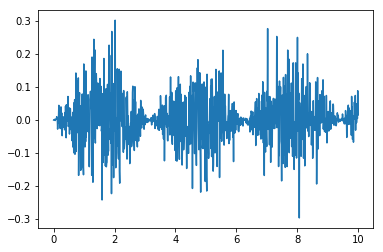

In [24]:
plt.plot(x,y)
plt.show()

In [28]:
##Now I am going to turn those two coordinates x,y in to a pandas data frame.
##And then to get it into H2O, we use h2o.H2OFrame and then our pandas data set.
sine_wave = pd.DataFrame({
    'a':x,
    'b':y
})

In [29]:
sine_wave_h2o= h2o.H2OFrame(
sine_wave
)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [30]:
sine_wave_h2o.summary()

,a,b
type,real,real
mins,0.0,-0.2965940354252533
mean,4.999999999999934,0.002116138049510411
maxs,10.0,0.3026285960565567
sigma,2.891081112663593,0.07151717962144781
zeros,1,1
missing,0,0
0,0.0,0.0
1,0.01,-0.000398623255607375
2,0.02,-0.00024619825701098746


In [32]:
# So what we actually want to do when using h2o.HOFrame,
# is specify destination_frame to the name we'd like to see it have on the H2O server
sine_wave_h2o = h2o.H2OFrame(
sine_wave,
destination_frame="sine_wave"
)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [34]:
sine_wave_h2o.as_data_frame()
#And this will turn it into a pandas data frame.
#So you can see we have all 1001 rows have been downloaded back into Python.

,a,b
0,0.00,0.000000
1,0.01,-0.000399
2,0.02,-0.000246
3,0.03,0.002203
4,0.04,0.000709
5,0.05,-0.001278
6,0.06,0.001403
7,0.07,0.002921
8,0.08,0.002329
9,0.09,0.002700
